Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

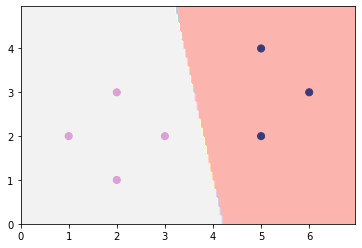

In [5]:
clf1a = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, clf1a.predict)



Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

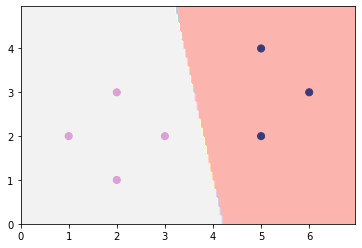

In [6]:
reg1a = LinearRegression().fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x: reg1a.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

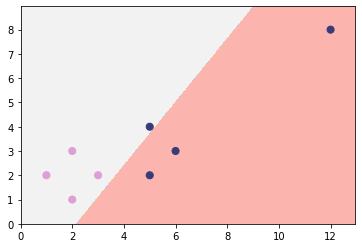

In [8]:
clf1b= RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, clf1b.predict)

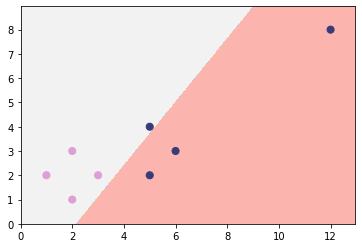

In [9]:
reg1b = LinearRegression().fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: reg1b.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

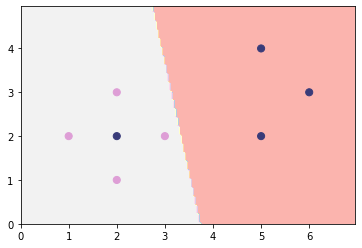

In [11]:
clf1c= RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, clf1c.predict)

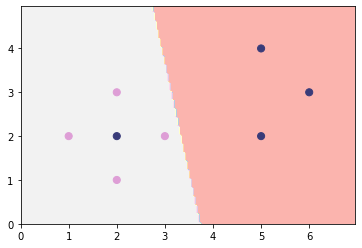

In [12]:
reg1c = LinearRegression().fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: reg1c.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

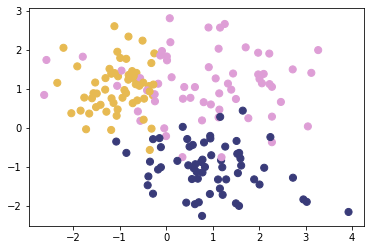

In [45]:
from sklearn.datasets import make_classification

X_2_multinom, y_2_multinom = make_classification(n_samples = 180, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=3)
plot_2d_clf_problem(X_2_multinom, y_2_multinom)

#print(y_2_multinom)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

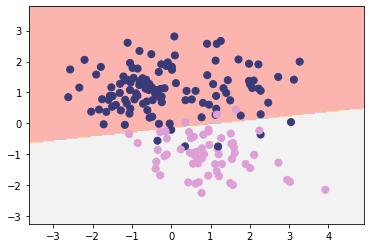

In [46]:
#tri binarna klasifikatora

y2_class0 = []
y2_class1 = []
y2_class2 = []

for y in y_2_multinom:
    if y==0:
        y2_class0.append(1)
        y2_class1.append(0)
        y2_class2.append(0)
    elif y==1:
        y2_class0.append(0)
        y2_class1.append(1)
        y2_class2.append(0)
    elif y==2:
        y2_class0.append(0)
        y2_class1.append(0)
        y2_class2.append(1)

reg2_class0 = LinearRegression().fit(X_2_multinom, y2_class0)
reg2_class1 = LinearRegression().fit(X_2_multinom, y2_class1)
reg2_class2 = LinearRegression().fit(X_2_multinom, y2_class2)

plot_2d_clf_problem(X_2_multinom, y2_class0, lambda x: reg2_class0.predict(x) >= 0.5)


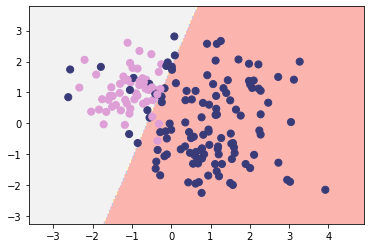

In [47]:
plot_2d_clf_problem(X_2_multinom, y2_class1, lambda x: reg2_class1.predict(x) >= 0.5)

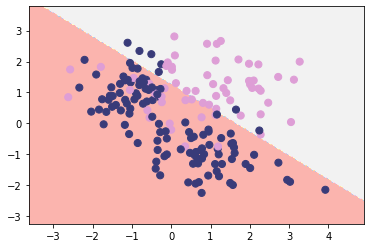

In [48]:
plot_2d_clf_problem(X_2_multinom, y2_class2, lambda x: reg2_class2.predict(x) >= 0.5)

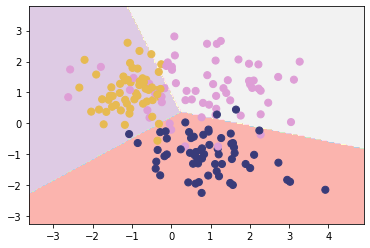

In [49]:
#h(x) = argmax hj(x)
h_max_function = lambda x: np.argmax([reg2_class0.predict(x.reshape(1, -1)), reg2_class1.predict(x.reshape(1, -1)),reg2_class2.predict(x.reshape(1, -1))])
plot_2d_clf_problem(X_2_multinom, y_2_multinom, h_max_function)

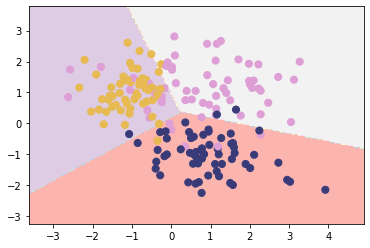

In [50]:
#RidgeClassifier
clf2 = RidgeClassifier().fit(X_2_multinom, y_2_multinom)
plot_2d_clf_problem(X_2_multinom, y_2_multinom, clf2.predict)


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [51]:
def sigm(x, a=1):
    return 1/(1+np.exp(-a*x))

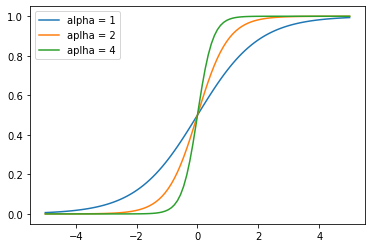

In [52]:
x_axis = np.linspace(-5, 5, 100)
for a in [1, 2 , 4]:
    plt.plot(x_axis, sigm(x_axis, a))
plt.legend(["alpha = 1", "aplha = 2", "aplha = 4"])


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [53]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
import math as mth

#vraca predikciju za primjer x i dane tezine w
def lr_h(x,w):
    h = np.matmul(w, np.transpose(x))
    return h


In [54]:
def cross_entropy_error(X, y, w):
    N = len(X)
    sum_loss = 0
    for i in range (len(X)):
        sum_loss += (-y[i]*mth.log(sigm(lr_h(X[i], w))) - (1-y[i])*mth.log(1 - sigm(lr_h(X[i], w))))
    c_e_err = sum_loss/N
    return c_e_err

In [55]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    old_err = 1
    new_err = 0
    w = np.ndarray(shape=(len(X[0])+1,))
    if trace:
        W_mat = []
    w.fill(0)
    poly = PolynomialFeatures(degree=1)
    fi_X = poly.fit_transform(X)
    while max_iter>=0 and abs(old_err-new_err)>epsilon:
        delta_w = np.ndarray(shape=(len(X[0])+1,))
        delta_w.fill(0)
        for i in range(len(fi_X)):
            delta_w -= (sigm(lr_h(fi_X[i], w)) - y[i]) * fi_X[i]
        w0 = w[0]
        w0 += eta*delta_w[0]
        w2 = w[1:]
        w2 = w2*(1-alpha*eta)
        w2 = w2 + eta*delta_w[1:]
        w = np.concatenate((np.array([w0]), w2))
        if trace:
            W_mat.append(w)
        max_iter-=1
        old_err = new_err
        new_err = cross_entropy_error(fi_X, y, w)
    cross_err = cross_entropy_error(fi_X, y, w)
    if trace:
        return w,W_mat, cross_err
    else:
        return w, cross_err

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [56]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [57]:
def predict2c(x, w):
    x = np.concatenate((np.array([1]), x))
    return np.matmul(w, np.transpose(x))

[ 4.45449454 -1.71089242  0.68413507]
0.13521872720206746


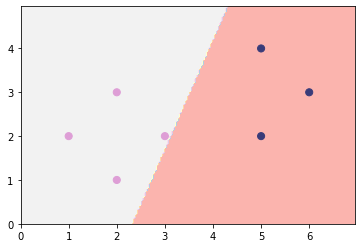

In [58]:
w_3c, cross_err = lr_train(seven_X, seven_y)
print(w_3c)
print(cross_err)

plot_2d_clf_problem(seven_X, seven_y, lambda x: predict2c(x, w_3c) >= 0.5 )


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [59]:
from sklearn.metrics import zero_one_loss

Text(0.5, 1.0, 'Pogreska - br.iteracija')

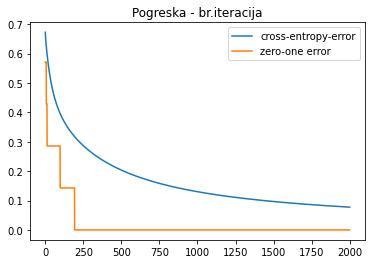

In [60]:
#prvi graf
nr_iter = np.linspace(0, 2000, 2001)
cross_errors = []
zero_one_errors = []
w_3d, W_mat3d, cross_err = lr_train(seven_X, seven_y, trace=True, epsilon=0.00001)

poly = PolynomialFeatures(degree=1)
Seven_fi_X = poly.fit_transform(seven_X)

h_decision = lambda x: x >= 0.5

for i in range (len(W_mat3d)):
    #cross-entropy-error
    cross_err = cross_entropy_error(Seven_fi_X, seven_y, W_mat3d[i])
    cross_errors.append(cross_err)
    #zero-one
    y_predicted = []
    for x in Seven_fi_X:
        h = sigm(lr_h(x, W_mat3d[i]))
        y_predicted.append(h_decision(h))
    zero_one_errors.append(zero_one_loss(seven_y, y_predicted))


plt.plot(nr_iter, cross_errors)
plt.plot(nr_iter, zero_one_errors)
plt.legend(["cross-entropy-error", "zero-one error"])
plt.title("Pogreska - br.iteracija")




Text(0.5, 1.0, 'Pogreska unakrsne entropije za razlicit eta - br.iteracija')

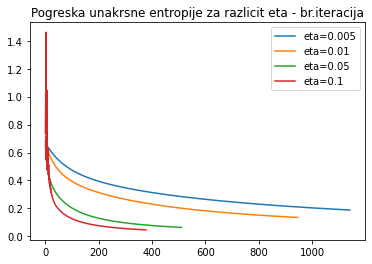

In [78]:
#drugi graf
etas = [0.005, 0.01, 0.05, 0.1]
for e in etas:
    errors_3d = []
    w_3d, W_mat3d, cross_err = lr_train(seven_X, seven_y, eta=e, trace = True)
    for w in W_mat3d:
        c_err = cross_entropy_error(Seven_fi_X, seven_y, w)
        errors_3d.append(c_err)
    plt.plot(nr_iter[:len(W_mat3d)], errors_3d)
plt.legend(["eta=0.005", "eta=0.01", "eta=0.05", "eta=0.1"])
plt.title("Pogreska unakrsne entropije za razlicit eta - br.iteracija")


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

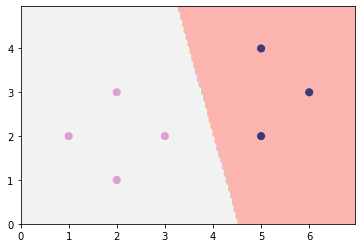

In [62]:
from sklearn.linear_model import LogisticRegression

clf3e = LogisticRegression().fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, clf3e.predict)


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [63]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

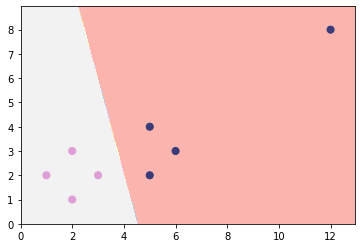

In [64]:
clf4a = LogisticRegression().fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, clf4a.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Text(0.5, 1.0, 'Izlaz modela h(x) - br.iteracija')

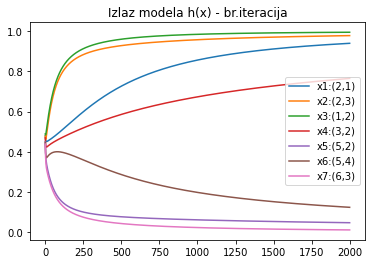

In [65]:
#GRAF1 - Matrica od 7 redaka - za svaki primjer iz x_seven računati sigma(h), spremiti u listu
prediction_by_x = []

for x in Seven_fi_X:
    h_list = []
    w_4b, W_mat4b, cross_err = lr_train(seven_X, seven_y, trace = True, epsilon=0.000001)
    for w in W_mat4b:
        h = sigm(lr_h(x, w))
        h_list.append(h)
    plt.plot(nr_iter, h_list)
plt.legend(["x1:(2,1)", "x2:(2,3)", "x3:(1,2)", "x4:(3,2)", "x5:(5,2)", "x6:(5,4)", "x7:(6,3)"])
plt.title("Izlaz modela h(x) - br.iteracija")

Text(0.5, 1.0, 'Tezine w - br.iteracija')

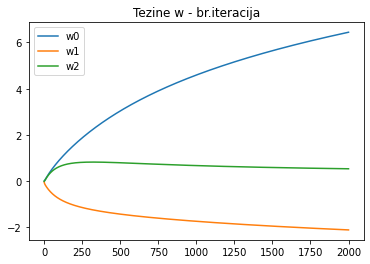

In [66]:
#GRAF2
w0 = []
w1 = []
w2 = []

for w in W_mat4b:
    w0.append(w[0])
    w1.append(w[1])
    w2.append(w[2])

plt.plot(nr_iter, w0)
plt.plot(nr_iter, w1)
plt.plot(nr_iter, w2)
plt.legend(["w0", "w1", "w2"])
plt.title("Tezine w - br.iteracija")

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [67]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Text(0.5, 1.0, 'Izlaz modela h(x) - br.iteracija')

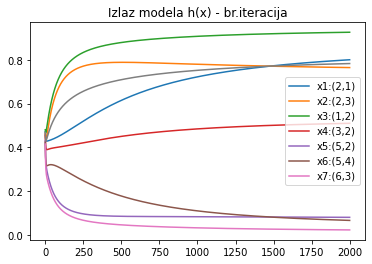

In [68]:
unsep_fi_X = poly.fit_transform(unsep_X)
for x in unsep_fi_X:
    h_list = []
    w_4c, W_mat4c, cross_err = lr_train(unsep_X, unsep_y, trace = True, epsilon=0.000001)
    for w in W_mat4c:
        h = sigm(lr_h(x, w))
        h_list.append(h)
    plt.plot(nr_iter, h_list)
plt.legend(["x1:(2,1)", "x2:(2,3)", "x3:(1,2)", "x4:(3,2)", "x5:(5,2)", "x6:(5,4)", "x7:(6,3)"])
plt.title("Izlaz modela h(x) - br.iteracija")


Text(0.5, 1.0, 'Tezine w - br.iteracija')

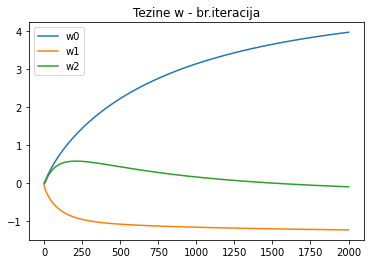

In [69]:
w0 = []
w1 = []
w2 = []

for w in W_mat4c:
    w0.append(w[0])
    w1.append(w[1])
    w2.append(w[2])

plt.plot(nr_iter, w0)
plt.plot(nr_iter, w1)
plt.plot(nr_iter, w2)
plt.legend(["w0", "w1", "w2"])
plt.title("Tezine w - br.iteracija")

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [70]:
from numpy.linalg import norm

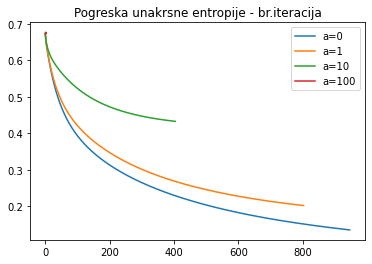

In [71]:
#GRAF1 - pogreska unakrsne entropije za svaku alphu po iteracijama
alpha = [0,1,10,100]
for a in alpha:
    errors_5 = []
    w_5, W_mat5, cross_err = lr_train(seven_X, seven_y, alpha=a, trace = True)
    for w in W_mat5:
        c_err = cross_entropy_error(Seven_fi_X, seven_y, w)
        errors_5.append(c_err)
    plt.plot(nr_iter[:len(W_mat5)], errors_5)
plt.title("Pogreska unakrsne entropije - br.iteracija")
plt.legend(["a=0", "a=1", "a=10", "a=100"])


Text(0.5, 1.0, 'L2 norma(w) - br.iteracija')

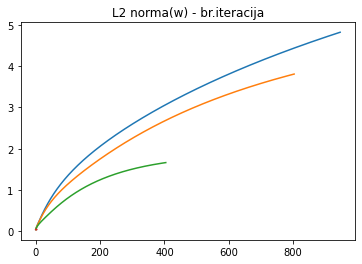

In [72]:
#GRAF2 - L2- norma vektora w kroz iteracije za svaku alphu
for a in alpha:
    L2_norms = []
    w_5, W_mat5, cross_err = lr_train(seven_X, seven_y, alpha=a, trace = True)
    for w in W_mat5:
        L2_norms.append(norm(w, 2))
    plt.plot(nr_iter[:len(W_mat5)], L2_norms)
plt.title("L2 norma(w) - br.iteracija")

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [73]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

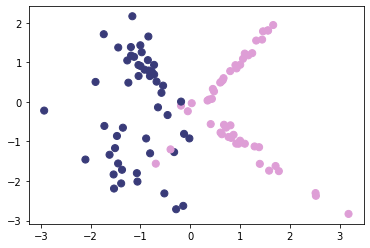

In [74]:
from sklearn.datasets import make_classification

X_6_multinom, y_6_multinom = make_classification(n_samples = 100, n_redundant=0, n_features=2, n_clusters_per_class=2, n_classes=2)
plot_2d_clf_problem(X_6_multinom, y_6_multinom)

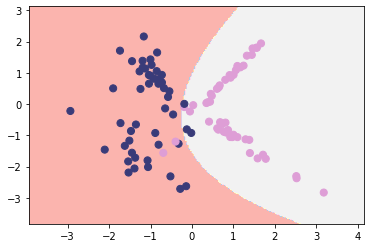

In [75]:
#d=2
poly = PolynomialFeatures(degree=2)
fi_6_X = poly.fit_transform(X_6_multinom)
clf6_d2 = LogisticRegression().fit(fi_6_X, y_6_multinom)
plot_2d_clf_problem(X_6_multinom, y_6_multinom, lambda x: clf6_d2.predict(poly.transform(x)) > 0.5)

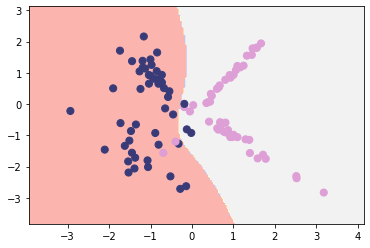

In [76]:
#d=3
poly = PolynomialFeatures(degree=3)
fi_6_X = poly.fit_transform(X_6_multinom)
clf6_d3 = LogisticRegression().fit(fi_6_X, y_6_multinom)
plot_2d_clf_problem(X_6_multinom, y_6_multinom, lambda x: clf6_d3.predict(poly.transform(x)) > 0.5)

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?